## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np


#### Change your present working directory

In [7]:
import os
path = os.getcwd()

print(path)

/content/drive/My Drive/Sequence Models LAB


In [0]:
os.chdir('/content/drive/My Drive/Sequence Models LAB')

### Load your data file

In [8]:
df = pd.read_csv('/content/drive/My Drive/Sequence Models LAB/daily-minimum-temperatures-in-me.csv', index_col='Date')
df.sort_index(inplace=True)
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Plot data

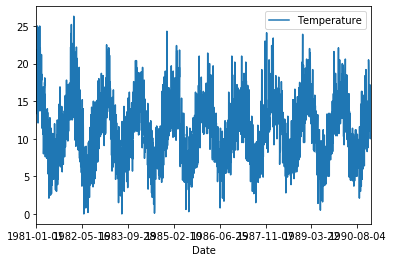

In [9]:
df.plot()

#### Descibe your dataframe

In [10]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [11]:
df.isnull().sum()

Temperature    0
dtype: int64

#### Drop null values

In [0]:

df.dropna(inplace=True)

#### Get the representation of the distribution of data in the form of histogram

In [0]:
import seaborn as sns

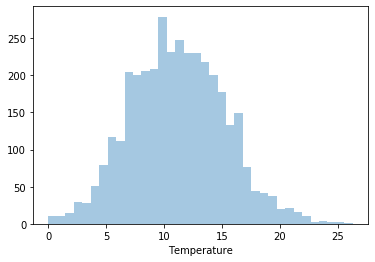

In [16]:
sns.distplot(df['Temperature'],kde=False)

#### Check the maximum and minimum values

In [17]:
print('Min', np.min(df))
print('Max', np.max(df))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


### Normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [129]:
#Check Data Range
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [128]:
scaled

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

### Split data into Training and Testing

In [127]:
#70% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.70)

#30% will be used for Test
test_size = len(scaled) - train_size

#Split the data
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


#### Print train and test size

In [130]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-1):
        
        a = dataset[i]  
              
        dataX.append(a)
        dataY.append(dataset[i+1])
    
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [0]:
#Create Input and Output
X_train, y_train = create_dataset(train)
X_test,y_test = create_dataset(test)


In [135]:
print(X_train.shape)
print(X_test.shape)

(2554, 1)
(1094, 1)


#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [136]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2554, 1, 1)
(1094, 1, 1)


## Define Model

In [0]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(1, 1)))
model.output
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')


In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Define sequntial model, add LSTM layer and compile the model

### Summarize your model

In [139]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [140]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

Train on 2554 samples, validate on 1094 samples
Epoch 1/200
2554/2554 [==============================] - 1s 335us/sample - loss: 0.0975 - val_loss: 0.0306
Epoch 2/200
2554/2554 [==============================] - 0s 118us/sample - loss: 0.0166 - val_loss: 0.0133
Epoch 3/200
2554/2554 [==============================] - 0s 113us/sample - loss: 0.0140 - val_loss: 0.0125
Epoch 4/200
2554/2554 [==============================] - 0s 117us/sample - loss: 0.0132 - val_loss: 0.0118
Epoch 5/200
2554/2554 [==============================] - 0s 116us/sample - loss: 0.0124 - val_loss: 0.0109
Epoch 6/200
2554/2554 [==============================] - 0s 110us/sample - loss: 0.0117 - val_loss: 0.0101
Epoch 7/200
2554/2554 [==============================] - 0s 116us/sample - loss: 0.0111 - val_loss: 0.0097
Epoch 8/200
2554/2554 [==============================] - 0s 126us/sample - loss: 0.0107 - val_loss: 0.0094
Epoch 9/200
2554/2554 [==============================] - 0s 119us/sample - loss: 0.0104 - val_lo

## Make Predictions and Evaluate your model

In [0]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [142]:
loss = model.evaluate(X_test,y_test)

1094/1094 [==============================] - 0s 43us/sample - loss: 0.0087


In [143]:
loss

0.008673494516563698

## Plot the results

In [0]:
#Un-normalize the predited data
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [147]:
trainPredict[0]

array([1.7340236], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

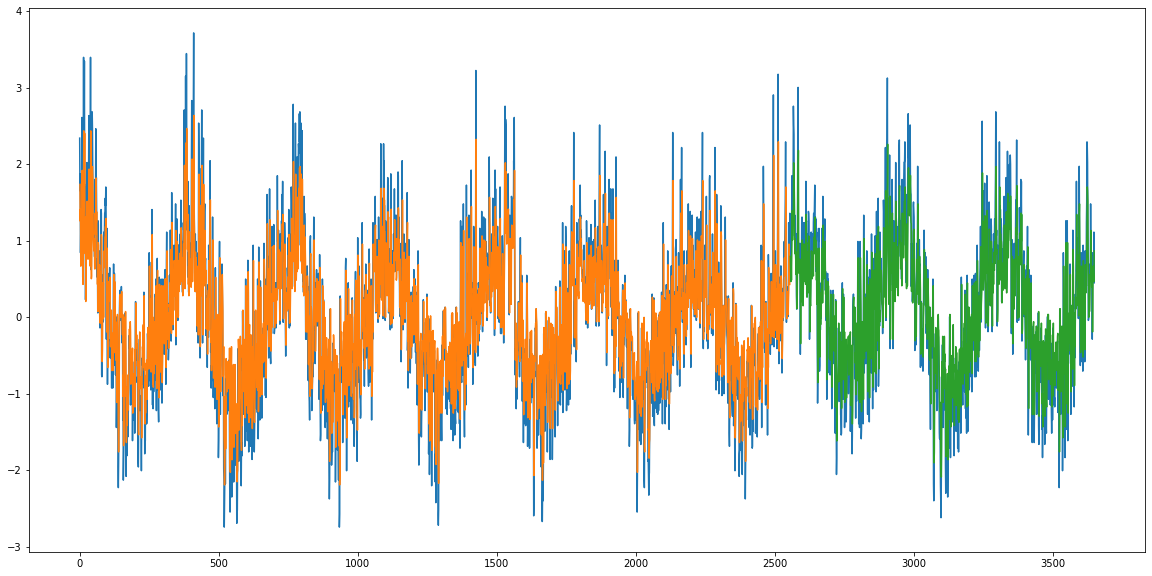

In [149]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()